In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

In [27]:
df=pd.read_csv('diabetes.csv')

In [28]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [29]:
df.shape

(768, 9)

In [30]:
X = df.drop('Outcome',axis=1).values
y = df['Outcome'].values

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4,random_state=42, stratify=y)

In [33]:
neighbors = np.arange(1,9)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)

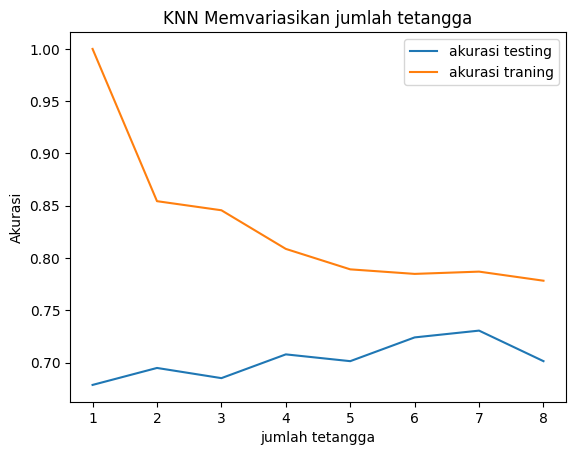

In [34]:
plt.title('KNN Memvariasikan jumlah tetangga')
plt.plot(neighbors, test_accuracy, label='akurasi testing')
plt.plot(neighbors, train_accuracy, label='akurasi traning')
plt.legend()
plt.xlabel('jumlah tetangga')
plt.ylabel('Akurasi')
plt.show()

In [35]:
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=8)

In [36]:
knn.score(X_test,y_test)

0.7012987012987013

In [37]:
from sklearn.metrics import confusion_matrix

In [38]:
y_pred = knn.predict(X_test)

In [39]:
confusion_matrix(y_test,y_pred)

array([[168,  33],
       [ 59,  48]])

In [40]:
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,168,33,201
1,59,48,107
All,227,81,308


In [42]:
from sklearn.metrics import classification_report

In [43]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.74      0.84      0.79       201
           1       0.59      0.45      0.51       107

    accuracy                           0.70       308
   macro avg       0.67      0.64      0.65       308
weighted avg       0.69      0.70      0.69       308



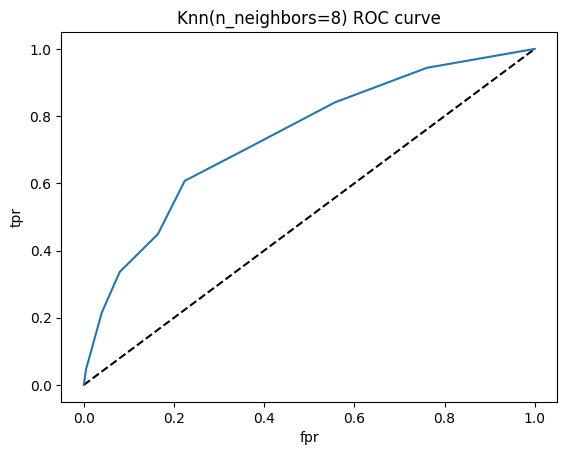

In [45]:
y_pred_proba = knn.predict_proba(X_test)[:,1]
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Knn(n_neighbors=8) ROC curve')
plt.show()

In [46]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_proba)

0.7358534430650485